In [130]:
# import data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [131]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [132]:
# load data
df = pd.read_csv("jiji_housing_raw.csv")
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,is_boost
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,"₦ 170,000,000",600,4,5,unfurnished,vip
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,"₦ 45,000,000",1500,5,4,furnished,diamond
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,"₦ 30,000,000",400,2,1,unfurnished,NaN
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,"₦ 150,000,000",1162,6,6,furnished,NaN
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,"₦ 250,000,000",1300,12,16,semi-furnished,NaN


In [133]:
# make is_boost boolean
df["boosted"] = df["is_boost"].notna()
df.drop(columns=["is_boost"], inplace=True)
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,"₦ 170,000,000",600,4,5,unfurnished,True
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,"₦ 45,000,000",1500,5,4,furnished,True
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,"₦ 30,000,000",400,2,1,unfurnished,False
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,"₦ 150,000,000",1162,6,6,furnished,False
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,"₦ 250,000,000",1300,12,16,semi-furnished,False


In [134]:
# inspecting data
df.isnull().sum()

title                 0
region                0
region_item_text      0
region_name           0
region_parent_name    4
price_title           0
property_size         0
bedrooms              0
bathrooms             0
furnishing            0
boosted               0
dtype: int64

In [135]:
# dropping missing values
df = df.dropna(subset=["region_parent_name"])
df.isnull().sum()

title                 0
region                0
region_item_text      0
region_name           0
region_parent_name    0
price_title           0
property_size         0
bedrooms              0
bathrooms             0
furnishing            0
boosted               0
dtype: int64

In [136]:
# price cleaning
df["price_title"]=(
    df["price_title"]
    .str.replace("₦", "", regex=False)
    .str.replace(",", "")
    .astype(float)
)

In [137]:
# droping price > 550 million
df = df[df["price_title"] <= 550_000_000] 

In [138]:
# dropping size > 2000 m2
df = df[df["property_size"] <= 2000]

In [139]:
num_cols = df[["price_title"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

price_title    0
dtype: int64

In [140]:
# Categorical Cleaning and Standardize
df["furnishing"] = df["furnishing"].astype(str).str.capitalize()

In [141]:
# create state and price_m2 column
df["state"] = df["region_item_text"].str.split(",", expand=True)[0]
df["price_m2"] = df["price_title"] / df["property_size"]
df.head()

,title,region,region_item_text,region_name,region_parent_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted,state,price_m2
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri","Imo, Owerri",Owerri,Imo State,"170,000,000.00",600,4,5,Unfurnished,True,Imo,"283,333.33"
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City","Edo, Benin City",Benin City,Edo State,"45,000,000.00",1500,5,4,Furnished,True,Edo,"30,000.00"
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo","Akwa Ibom, Uyo",Uyo,Akwa Ibom State,"30,000,000.00",400,2,1,Unfurnished,False,Akwa Ibom,"75,000.00"
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor","Rivers, Obio-Akpor",Obio-Akpor,Rivers State,"150,000,000.00",1162,6,6,Furnished,False,Rivers,"129,087.78"
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA","Abuja, Lugbe District",FHA,Lugbe District,"250,000,000.00",1300,12,16,Semi-furnished,False,Abuja,"192,307.69"


In [142]:
# drop unecessary columns
df.drop(columns=["region_item_text", "region_parent_name" ], inplace=True)
df.head()

,title,region,region_name,price_title,property_size,bedrooms,bathrooms,furnishing,boosted,state,price_m2
0,"4bdrm Duplex in Abuja Estate, Owerri for sale","Imo State, Owerri",Owerri,"170,000,000.00",600,4,5,Unfurnished,True,Imo,"283,333.33"
1,"Furnished 5bdrm Bungalow in Prime Property, Be...","Edo State, Benin City",Benin City,"45,000,000.00",1500,5,4,Furnished,True,Edo,"30,000.00"
2,2bdrm Block of Flats in Uyo for sale,"Akwa Ibom State, Uyo",Uyo,"30,000,000.00",400,2,1,Unfurnished,False,Akwa Ibom,"75,000.00"
3,"Furnished 6bdrm Duplex in Port Harcourt, Obio-...","Rivers State, Obio-Akpor",Obio-Akpor,"150,000,000.00",1162,6,6,Furnished,False,Rivers,"129,087.78"
4,"12bdrm Block of Flats in Kapua, FHA for sale","Lugbe District, FHA",FHA,"250,000,000.00",1300,12,16,Semi-furnished,False,Abuja,"192,307.69"


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1618 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1618 non-null   object 
 1   region         1618 non-null   object 
 2   region_name    1618 non-null   object 
 3   price_title    1618 non-null   float64
 4   property_size  1618 non-null   int64  
 5   bedrooms       1618 non-null   int64  
 6   bathrooms      1618 non-null   int64  
 7   furnishing     1618 non-null   object 
 8   boosted        1618 non-null   bool   
 9   state          1618 non-null   object 
 10  price_m2       1618 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 140.6+ KB


In [144]:
# check for duuplicated rows
df["title"].duplicated().sum()

np.int64(373)

In [145]:
# drop duplicates
df.drop_duplicates(subset=["title"], inplace=True)

In [146]:
df.to_csv("jiji_housing_cleaned.csv", index=False)

In [147]:
df["price_title"].describe()

count         1,245.00
mean    207,580,313.32
std     139,089,677.09
min       3,000,000.00
25%      90,000,000.00
50%     180,000,000.00
75%     300,000,000.00
max     550,000,000.00
Name: price_title, dtype: float64

In [148]:
# price analysis(mean_price)
mean_price = df["price_title"].mean()
print("The average price of housing in Nigeria (jiji) is ", mean_price)

The average price of housing in Nigeria (jiji) is  207580313.32369477


In [149]:
# state with the highest and lowest mean property price
state_by_avg_price = df.groupby("state")["price_title"].sum().sort_values(ascending=False)
state_by_avg_price

state
Lagos       152,889,050,088.00
Abuja        48,492,940,000.00
Oyo          22,174,000,000.00
Rivers       14,119,000,000.00
Enugu        12,917,000,000.00
Edo           4,321,000,000.00
Ondo          1,451,000,000.00
Imo             619,500,000.00
Ogun            583,500,000.00
Ebonyi          350,000,000.00
Osun            164,500,000.00
Delta           143,500,000.00
Jigawa           75,000,000.00
Kogi             65,000,000.00
Akwa Ibom        30,000,000.00
Kwara            17,000,000.00
Benue            15,000,000.00
Abia             10,500,000.00
Name: price_title, dtype: float64

In [150]:
# state with the highest and lowest mean property price
state_by_avg_price = df.groupby("state")["price_title"].mean().sort_values(ascending=False)
state_by_avg_price

state
Ebonyi      350,000,000.00
Lagos       241,530,884.82
Abuja       202,053,916.67
Rivers      201,700,000.00
Enugu       195,712,121.21
Oyo         146,847,682.12
Edo         144,033,333.33
Imo         123,900,000.00
Jigawa       75,000,000.00
Ondo         65,954,545.45
Kogi         65,000,000.00
Delta        47,833,333.33
Ogun         44,884,615.38
Osun         41,125,000.00
Akwa Ibom    30,000,000.00
Benue        15,000,000.00
Abia         10,500,000.00
Kwara         8,500,000.00
Name: price_title, dtype: float64

In [151]:
# Property Size & Features
state_by_ppt_size = df.groupby("state")["property_size"].mean().sort_values(ascending=False)
state_by_ppt_size

state
Ebonyi      1,300.00
Edo           897.57
Ondo          835.09
Benue         750.00
Rivers        589.34
Oyo           572.41
Abuja         572.03
Imo           558.80
Enugu         557.50
Ogun          541.77
Osun          501.50
Lagos         471.69
Delta         426.33
Kwara         401.50
Akwa Ibom     400.00
Kogi          289.00
Abia          232.00
Jigawa        180.00
Name: property_size, dtype: float64

In [152]:
df["property_size"].describe()

count   1,245.00
mean      532.31
std       289.85
min        10.00
25%       350.00
50%       500.00
75%       600.00
max     2,000.00
Name: property_size, dtype: float64

In [153]:
bedrm_by_price = df.groupby("bedrooms")["price_title"].mean().sort_values(ascending=False)
bedrm_by_price

# from this, more bedroom does not directly equal more price, but it strongly affects the price

bedrooms
5    319,663,476.56
7    260,714,285.71
6    251,328,947.37
11   243,333,333.33
4    221,878,048.98
20   211,500,000.00
16   175,000,000.00
10   163,750,000.00
18   159,285,714.29
12   142,454,545.45
8    140,000,000.00
3    137,601,460.67
2    122,301,838.24
1     78,151,515.15
9     35,833,333.33
Name: price_title, dtype: float64

In [154]:
# Regional Trends
region_count = df.groupby("region")["price_title"].count().sort_values(ascending=False)
region_count

region
Enugu State, Enugu                  66
Oyo State, Ibadan                   57
Lagos State, Lekki                  54
Rivers State, Port-Harcourt         51
Lekki, Chevron                      44
                                    ..
Sagamu, Shimawa                      1
Surulere, Abraham Adesanya           1
Victoria Island, Ligali Ayorinde     1
Wuse, Zone 4 / Wuse                  1
Yaba, Ebute Metta                    1
Name: price_title, Length: 223, dtype: int64

In [155]:
# regions that dominate premium property sales
premium_sales = df[df["boosted"] == True]
premium_by_region = premium_sales.groupby("region")["boosted"].count().sort_values(ascending=False)
premium_by_region

region
Enugu State, Enugu                  56
Lagos State, Lekki                  53
Oyo State, Ibadan                   53
Rivers State, Port-Harcourt         51
Lekki, Chevron                      42
                                    ..
Sagamu, Shimawa                      1
Shomolu, Palmgroove                  1
Surulere, Abraham Adesanya           1
Victoria Island, Ligali Ayorinde     1
Yaba, Ebute Metta                    1
Name: boosted, Length: 208, dtype: int64

In [156]:
# Furnishing Analysis
Furnishing_avg_price = df.groupby("furnishing")["price_title"].mean().sort_values(ascending=False)
Furnishing_avg_price

furnishing
Furnished        220,792,635.66
Semi-furnished   219,804,458.04
Unfurnished      192,751,993.01
Name: price_title, dtype: float64

In [157]:
# Listing Type
boosted_by_price = df.groupby("boosted")["price_title"].mean().sort_values(ascending=False)
boosted_by_price

# boosted listings have higher prices

boosted
True    213,060,872.27
False   134,632,183.91
Name: price_title, dtype: float64

In [158]:
# Visualization

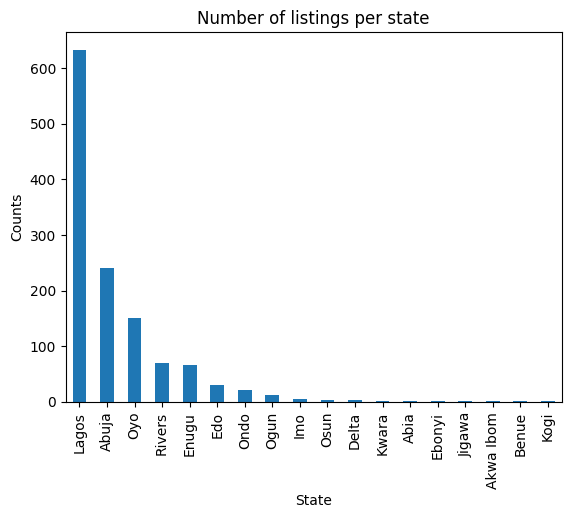

In [159]:
# Bar Chart: Number of listings per state
(
    df
    .groupby("state")
    ["price_title"].count()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Counts",
        title="Number of listings per state"
    )
);

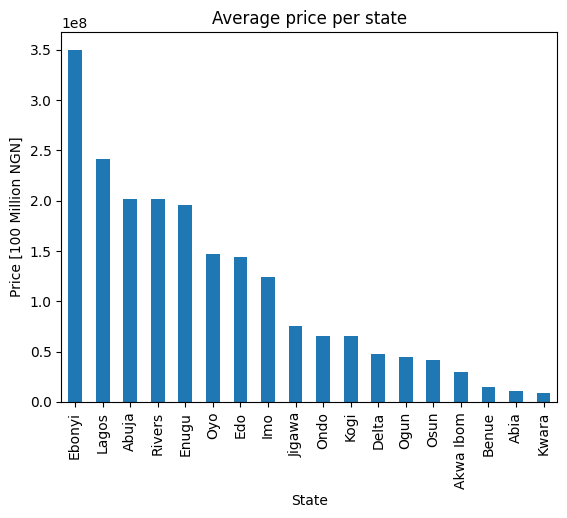

In [160]:
# Bar Chart: Average price per state
(
    df
    .groupby("state")
    ["price_title"].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Price [100 Million NGN]",
        title="Average price per state"
    )
);

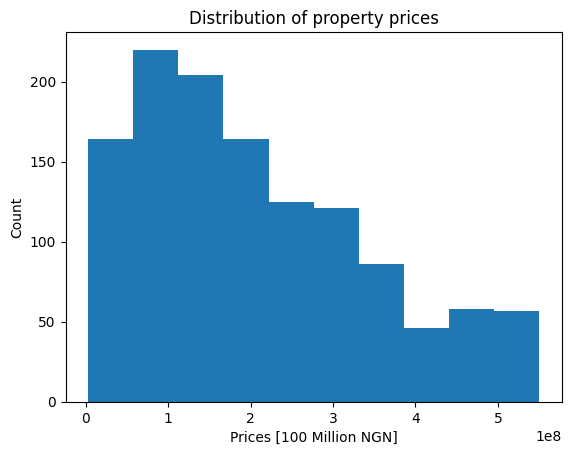

In [161]:
# Histogram: Distribution of property prices
plt.hist(df["price_title"])
plt.xlabel("Prices [100 Million NGN]")
plt.ylabel("Count")
plt.title("Distribution of property prices");

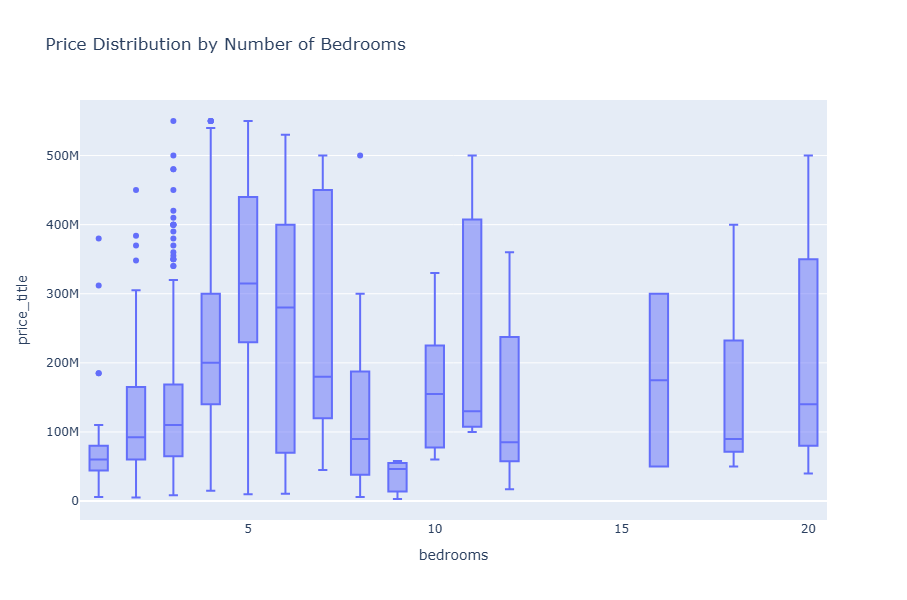

In [162]:
# Boxplot: Price by number of bedrooms
fig = px.box(
    df,
    x="bedrooms",
    y="price_title",
    title="Price Distribution by Number of Bedrooms"
    # points="all"
)
fig.update_layout(width=600, height=600)
fig.show()

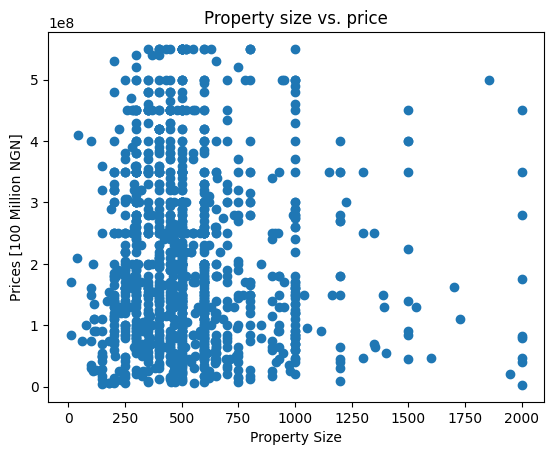

In [163]:
# Scatter Plot: Property size vs. price
plt.scatter(df["property_size"], df["price_title"])
plt.xlabel("Property Size")
plt.ylabel("Prices [100 Million NGN]")
plt.title("Property size vs. price")
plt.show()

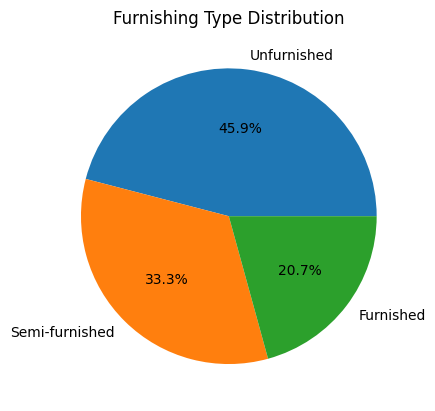

In [164]:
# Pie Chart: Furnishing type distribution
furnishing_counts = df["furnishing"].value_counts()
plt.pie(
    furnishing_counts,
    labels=furnishing_counts.index,
    autopct="%1.1f%%",
)
plt.title("Furnishing Type Distribution")
plt.show()

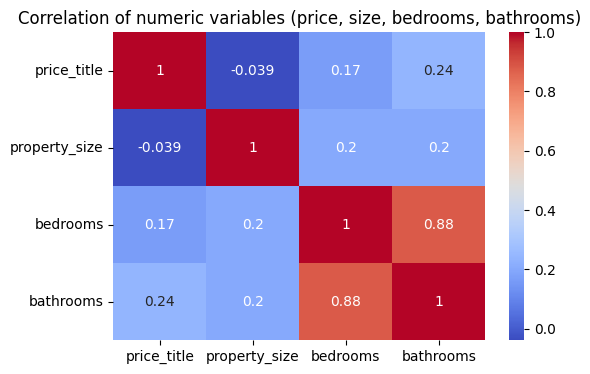

In [165]:
# Heatmap: Correlation of numeric variables (price, size, bedrooms, bathrooms)
corr = df[["price_title", "property_size", "bedrooms", "bathrooms"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Correlation of numeric variables (price, size, bedrooms, bathrooms)")
plt.show()

# Summary of Findings
Highest-Priced States: Lagos and Abuja dominate the market with the highest property prices, driven by prime locations, infrastructure, and strong demand.
Most Affordable States: Surrounding and non-metropolitan states such as Ogun, Oyo, and other regional markets offer significantly lower-priced listings. Smaller cities and less urbanised areas show the lowest median prices, offering more budget-friendly housing options.
Furnishing Effect: Furnished properties consistently command higher prices than unfurnished homes, reflecting added comfort and readiness for occupancy.
Size & Features Impact: Number of bathrooms has the strongest influence on pricing, followed by bedrooms, all showing a positive correlation with price.
Boosted Listings: Enterprise (boosted) listings are generally more expensive, indicating they are primarily used to market high-value properties.
Premium Property Types: Detached houses, duplexes, and luxury apartments attract premium pricing compared to flats and mini-flats.
Regional Comparison: Lagos and Abuja exhibit a concentration of luxury and high-end listings, while other regions remain more affordable and value-driven.

# Business Insights & Recommendations
Top-Performing Features: Luxury houses and well-finished apartments (especially furnished or semi-furnished units with multiple bathrooms) perform best overall, attracting the highest prices on Jiji.
Highest Revenue Potential: Lagos, followed by Abuja, contributes the strongest revenue potential due to its concentration of premium listings, high buyer demand, and active real estate market.
Underperforming States: Less urbanised states and smaller cities in states such as Kwara, Abia, and Benue show lower pricing and weaker demand, indicating underperformance compared to major cities.
Improving Low-Performing Regions: Sellers in underperforming states should focus on competitive pricing, improved property presentation, and clearer value propositions to attract buyers.
Boosting Visibility & Pricing Power: Using boosted (Enterprise) listings, high-quality photos, detailed descriptions, and highlighting furnishing or premium features can significantly improve visibility and achievable prices.
Offering flexible payment plans can also help improve sales and achieve the desired price.